# K Nearest Neighbors Explore. 
En este proyecto, se buscará crear un predictor de la calidad de vinos, de acuerdo a sus características químicas y utilizando el modeo K Nearest Neighbors (KNN).

## Paso 1. Cargar la data. 
Se obtiene la data e información útil acerca del datafram.

In [62]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [64]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


En este caso podemos visualizar que la base de datos, es una base de datos muy limpia, sin valores nulos.

Algo importante que se observo, es que hay algunos valores atípicos, de acuerdo al describe de la data, por lo que se visualizarán los datos en un breve EDA:

Nota:  
En el set de datos no hay una variable label, sin embargo, la variable que la representa, es la variable "quality" por lo que se sustituirá como sigue:

In [65]:
df.rename(columns={'quality': 'label'}, inplace=True)

In [66]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### EDA

#### Análisis univariable. 

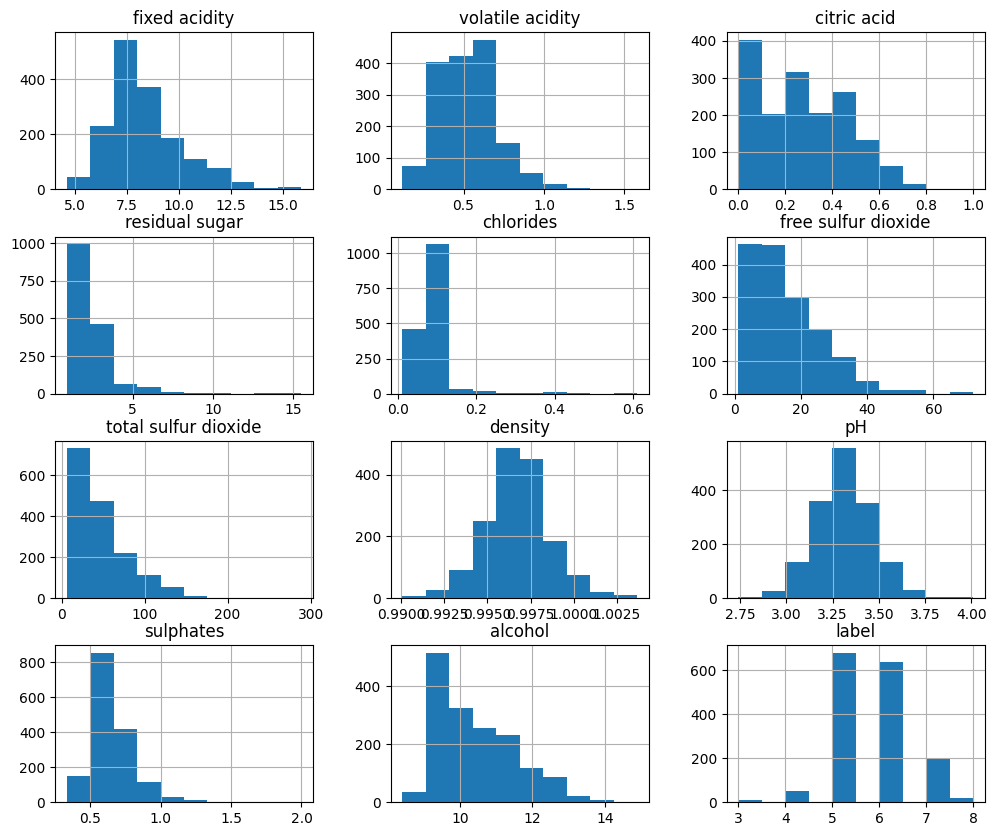

In [67]:
import matplotlib.pyplot as plt


df.hist(figsize=(12,10))
plt.show()

#### Análisis de outliers. 


<Axes: xlabel='residual sugar'>

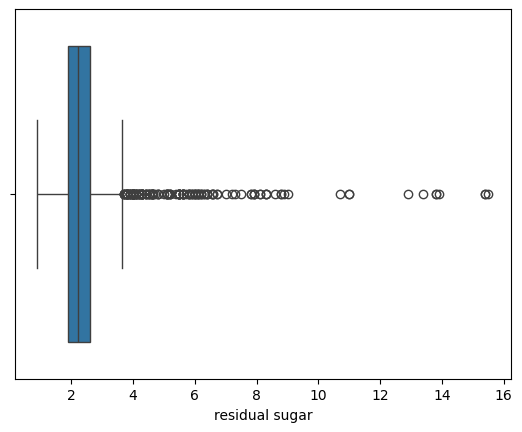

In [68]:
import seaborn as sns

sns.boxplot(x=df["residual sugar"])

<Axes: xlabel='chlorides'>

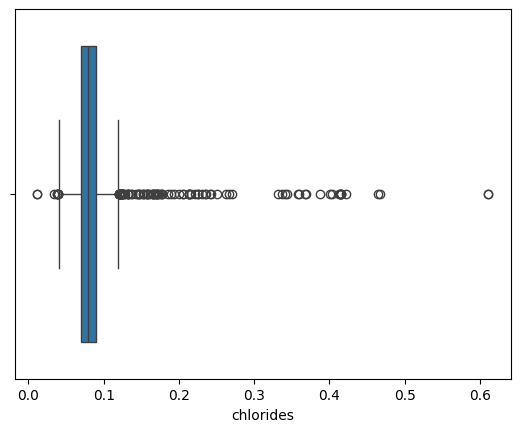

In [69]:
sns.boxplot(x=df["chlorides"])

<Axes: xlabel='free sulfur dioxide'>

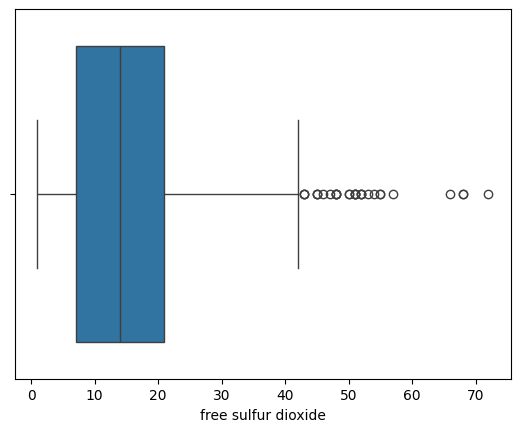

In [70]:
sns.boxplot(x=df["free sulfur dioxide"])

<Axes: xlabel='total sulfur dioxide'>

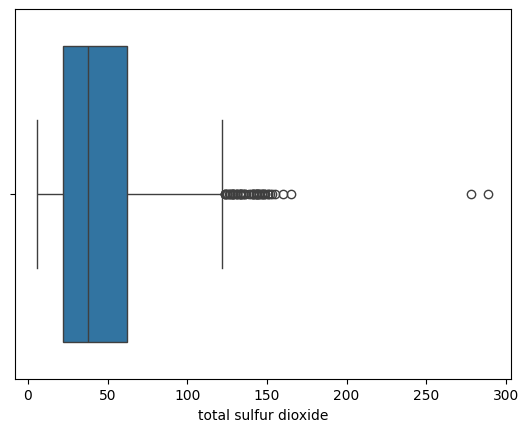

In [71]:
sns.boxplot(x=df["total sulfur dioxide"])

<Axes: xlabel='sulphates'>

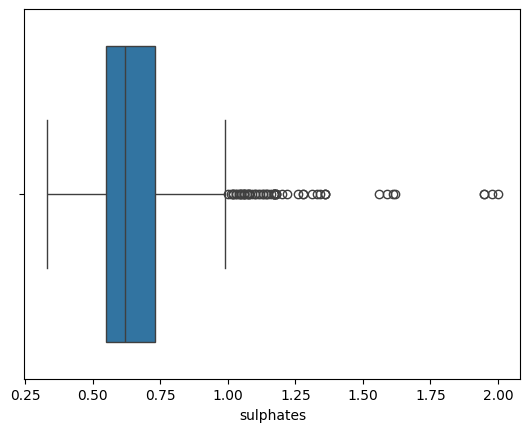

In [72]:
sns.boxplot(x=df["sulphates"])

Al observar boxplots, es posible identificar que algunas variables tienen una gran cantidad de valores atípicos, se verificará si es posible eliminar estos datos, que representan menos del 5% de los datos totales

In [73]:
# Calculo del 5% del total de los datos
five_percent = 1599 * 0.05
five_percent

79.95

In [74]:
data_rs = df['residual sugar']
data_c = df['chlorides']
data_fsd = df['free sulfur dioxide']
data_tsd = df['total sulfur dioxide']
data_sul = df['sulphates']

### Función para saber si es posible eliminar los valores atípicos.

In [75]:
## Paso 2.  
def find_outliers_IQR(dataf):
   q1=dataf.quantile(0.25)
   q3=dataf.quantile(0.75)
   IQR=q3-q1
   outliers = dataf[((dataf<(q1-1.5*IQR)) | (dataf>(q3+1.5*IQR)))]
   min_outlier = min(outliers)
   number_of_outlier = len(dataf[dataf > min_outlier])
   
   return number_of_outlier

total_outliers_p = find_outliers_IQR(data_rs)
total_outliers_mn= find_outliers_IQR(data_c)
total_outliers_nr= find_outliers_IQR(data_fsd)
total_outliers_rm= find_outliers_IQR(data_tsd)
total_outliers_chlc= find_outliers_IQR(data_sul)


def is_eliminated_outlier(all_outliers, variable):
   if all_outliers >= five_percent:
      print(f'❌ Con {all_outliers}, No es posible eliminar los outliers de {variable}, pues representan más del 5% de los datos.')
   elif all_outliers < five_percent:
      print(f'✅ Con {all_outliers}, Es posible eliminar los outliers de {variable}, pues representan menos del 5% de los datos.')

is_eliminated_outlier(total_outliers_p, "residual sugar")
is_eliminated_outlier(total_outliers_mn, "chlorides")
is_eliminated_outlier(total_outliers_nr, "free sulfur dioxide")
is_eliminated_outlier(total_outliers_rm, "total sulfur dioxide")
is_eliminated_outlier(total_outliers_chlc, "sulphates")

❌ Con 151, No es posible eliminar los outliers de residual sugar, pues representan más del 5% de los datos.
❌ Con 1597, No es posible eliminar los outliers de chlorides, pues representan más del 5% de los datos.
✅ Con 27, Es posible eliminar los outliers de free sulfur dioxide, pues representan menos del 5% de los datos.
✅ Con 52, Es posible eliminar los outliers de total sulfur dioxide, pues representan menos del 5% de los datos.
✅ Con 58, Es posible eliminar los outliers de sulphates, pues representan menos del 5% de los datos.


De acuerdo a los resultados obtenidos, es posible identificar que de las variables residual sugar y chlorides, se pueden eliminar los outliers.

#### Eliminación de outliers. 

#### Análisis bivariado. 


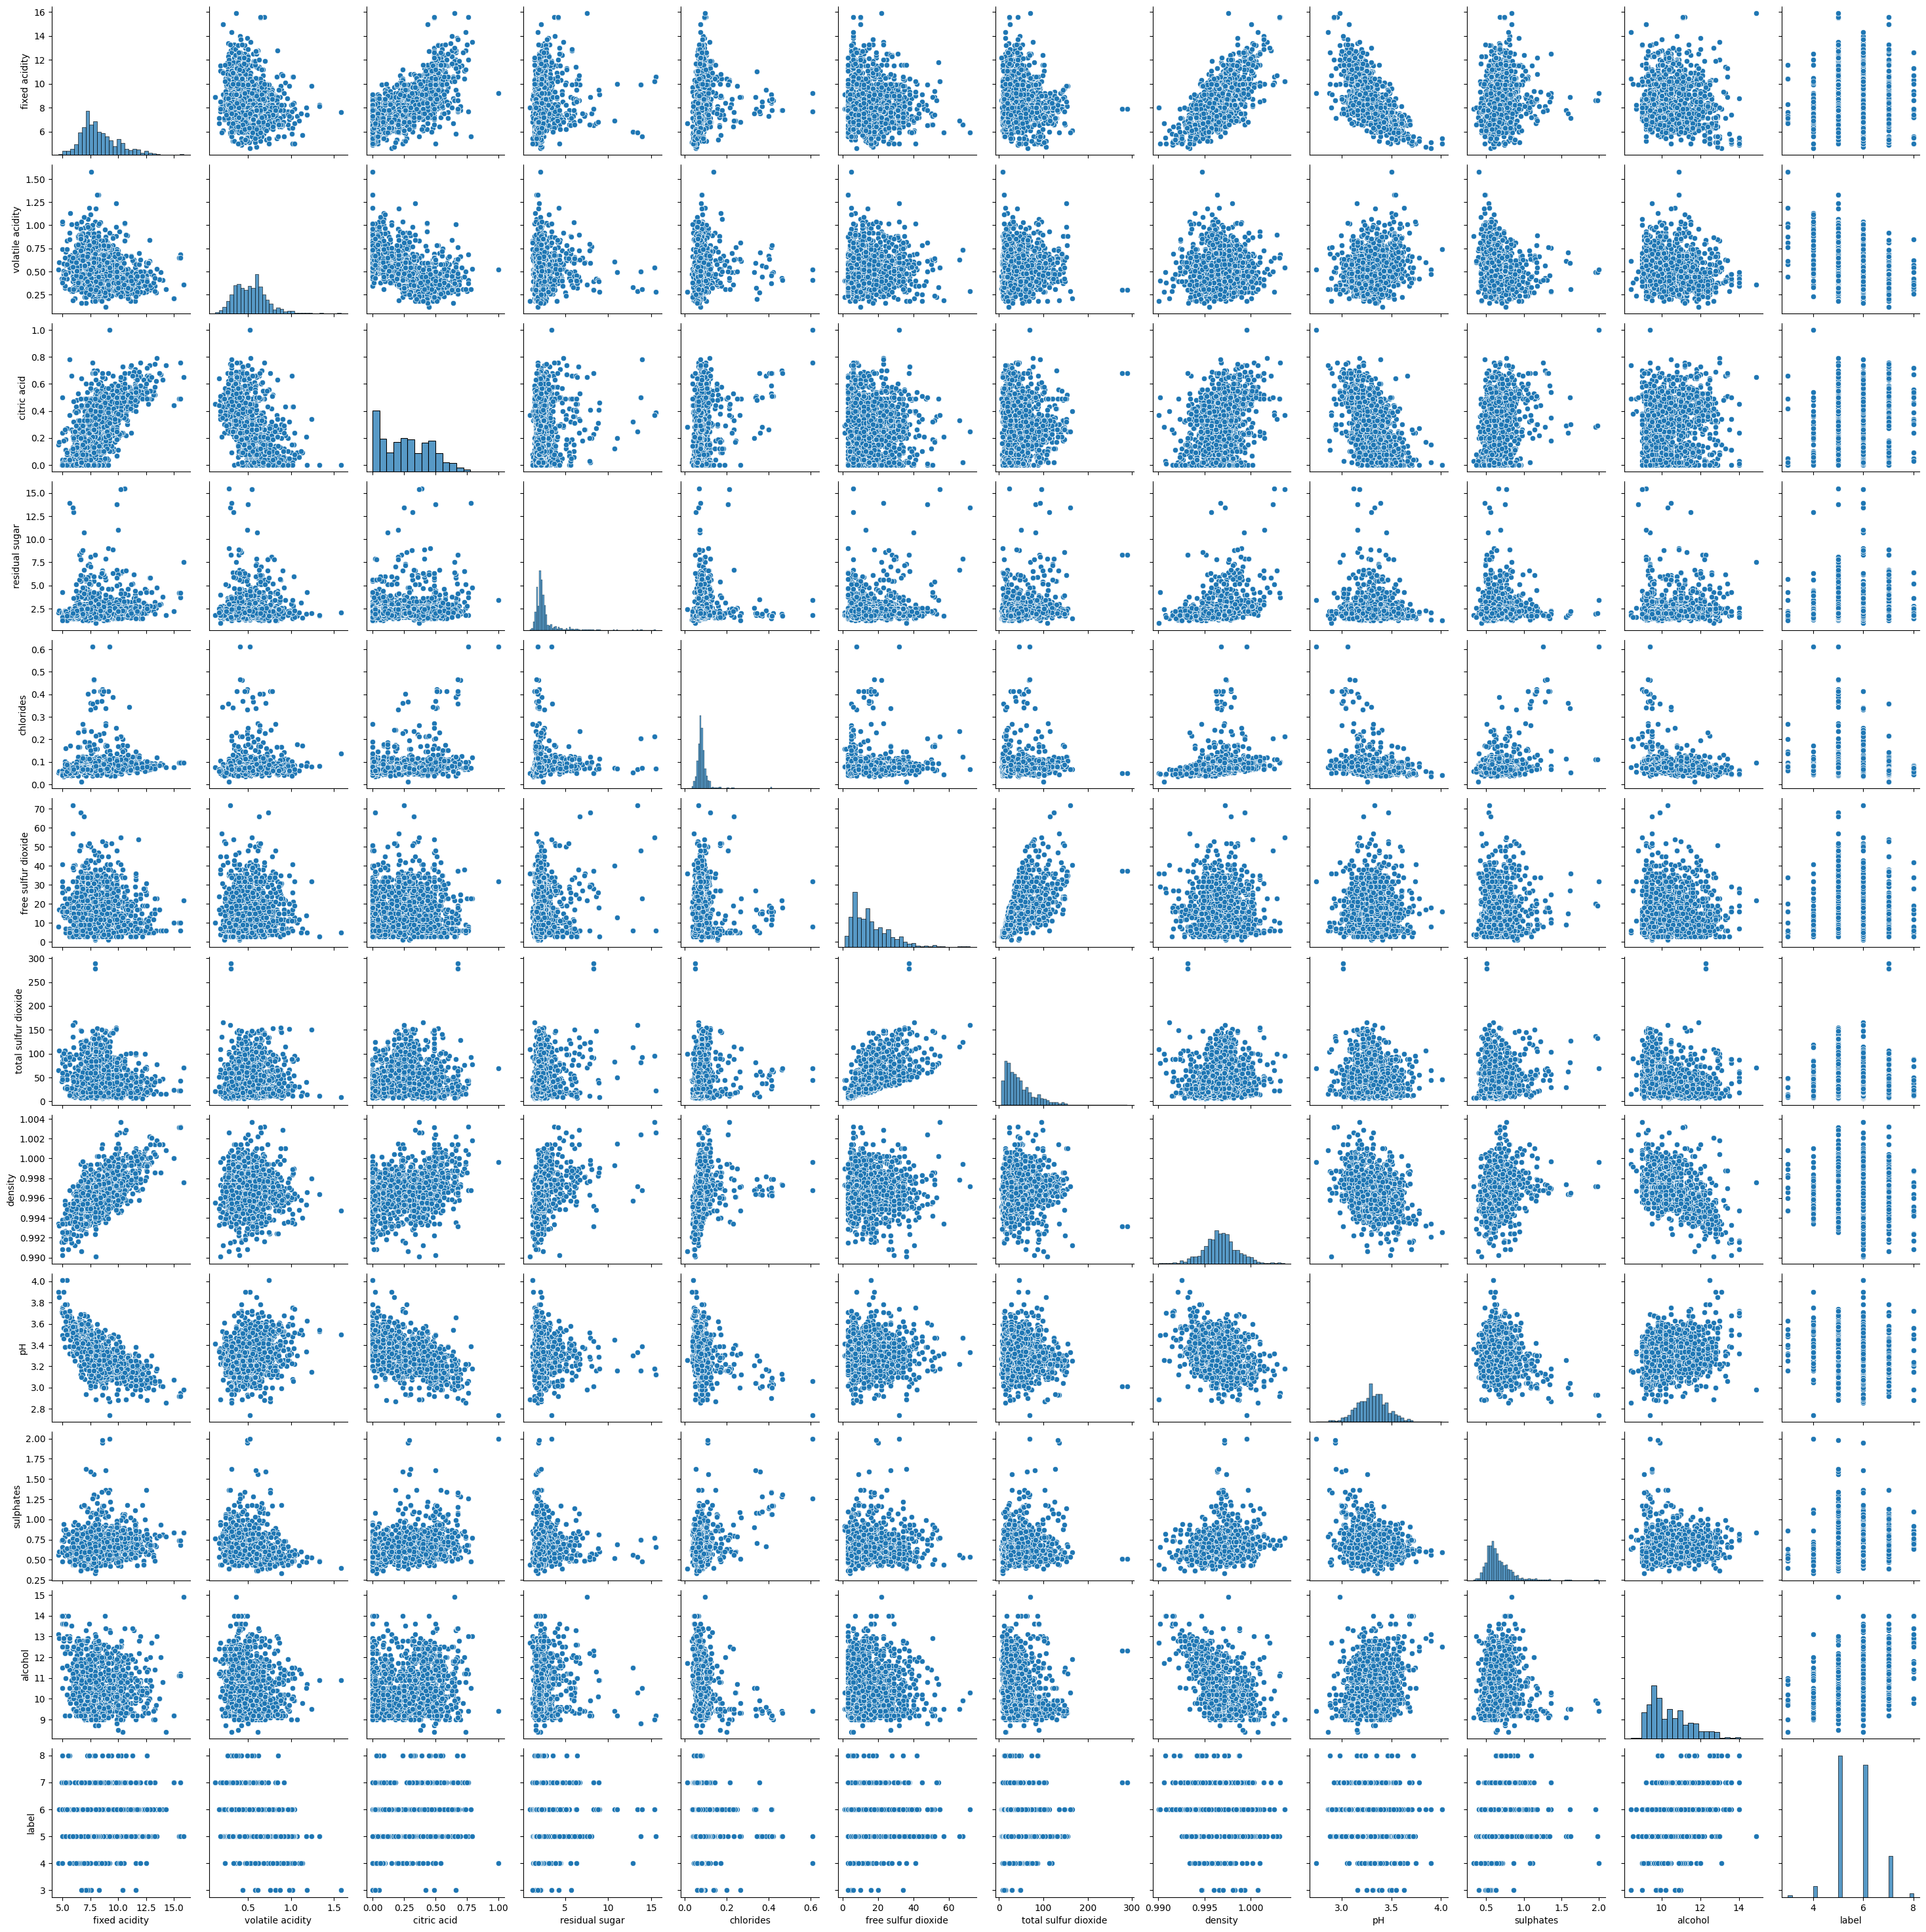

In [76]:
sns.pairplot(df)

Para buscar la posible correlación entre variables, se normalizarán los datos:

#### Correlaciones. 

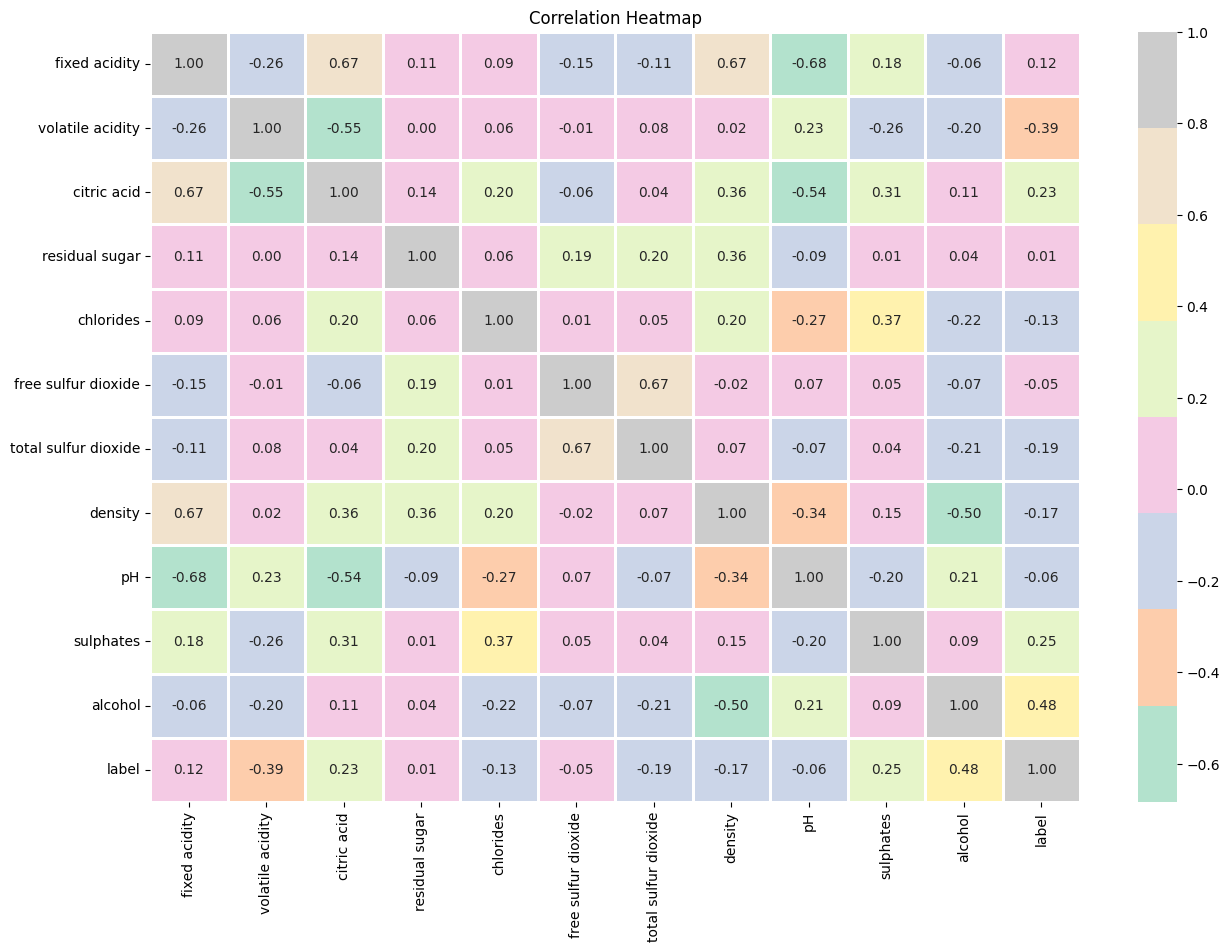

In [77]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

#### Observaciones. 
En la matriz de correlación anterior, se pueden observar variables con correlaciones débiles, sin embargo, es interesante.

## Paso 2. Entrenar Modelo KNN. 

Se divide el set de datos en train y test:

In [78]:
from sklearn.model_selection import train_test_split

X = df.drop("", axis = 1)
y = df[""]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

KeyError: "[''] not found in axis"